In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#own modules / functions
import sys

pythonPackagePath = "/Users/johannesschoeneberg/git/pyLattice/src/python/"
sys.path.append(pythonPackagePath+"/modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append(pythonPackagePath+"/classes")
import Track

# input data

In [2]:
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/_inputParameters.csv',names=['key','value'])
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data/_inputParameters.csv',names=['key','value'])
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_DMSO_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])
inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_JASP_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_LY_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])

inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")
print(inputDataFolder)
print(outputDataFolder)
inputDataFolder = inputDataFolder.replace("6big","Samsung_T3b")#'/Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample7_CD_LY_10ulMG__Position2_O1_bleachCorr/output/'
outputDataFolder = outputDataFolder.replace("6big","Samsung_T3b")#'/Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample7_CD_LY_10ulMG__Position2_O1_bleachCorr/output/'
print(inputDataFolder)
print(outputDataFolder)

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)



/Volumes/6big/science/daphne_data_processing/2016-04-28Daphne__Sample5_CD_JASP_10ulMG__Position2_O1_bleachCorr/
/Volumes/6big/science/daphne_data_processing/2016-04-28Daphne__Sample5_CD_JASP_10ulMG__Position2_O1_bleachCorr/output/
/Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample5_CD_JASP_10ulMG__Position2_O1_bleachCorr/
/Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample5_CD_JASP_10ulMG__Position2_O1_bleachCorr/output/
5689.0


In [3]:
slave_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,slave_uniqueFilenameString)
master_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,master_uniqueFilenameString)

--- folder searched in: /Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample5_CD_JASP_10ulMG__Position2_O1_bleachCorr/
--- example of files found: S5P2_488_150mw_560_300mw_10ms_dz200nm_ch0_CAM1_stack0000_488nm_0000000msec_0019413653msecAbs_000x_000y_003z_0000t_decon.tif_ratioCorrected.tif
--- number of files found: 70
--- folder searched in: /Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample5_CD_JASP_10ulMG__Position2_O1_bleachCorr/
--- example of files found: S5P2_488_150mw_560_300mw_10ms_dz200nm_ch1_CAM1_stack0000_560nm_0000000msec_0019413653msecAbs_000x_000y_003z_0000t_decon.tif_ratioCorrected.tif
--- number of files found: 70


/Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample5_CD_JASP_10ulMG__Position2_O1_bleachCorr//S5P2_488_150mw_560_300mw_10ms_dz200nm_ch1_CAM1_stack0000_560nm_0000000msec_0019413653msecAbs_000x_000y_003z_0000t_decon.tif_ratioCorrected.tif
(126, 704, 512)


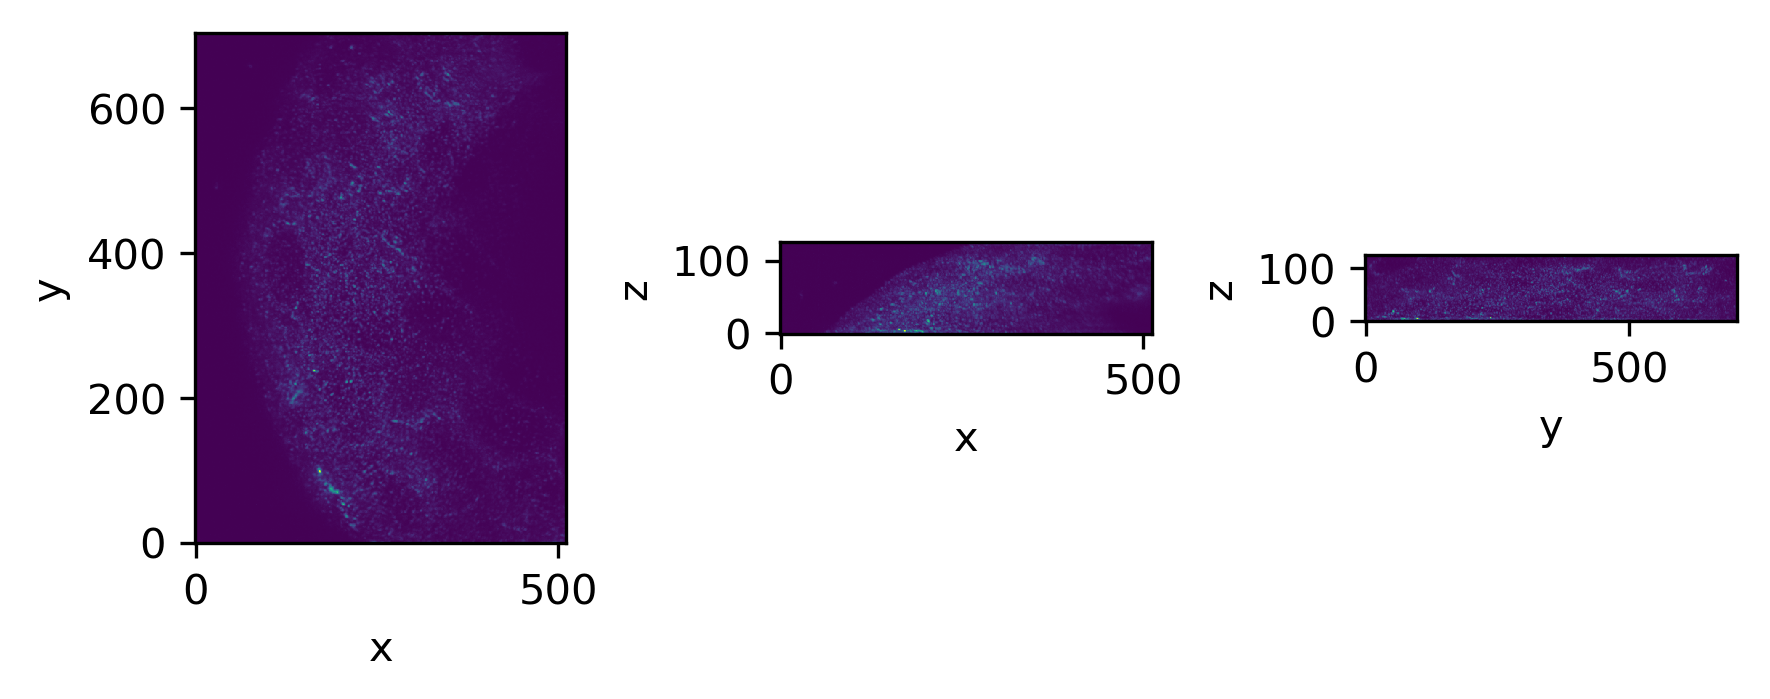

In [4]:
# read the image from where the detections come from
frameId = 0

path = inputDataFolder+'/'+master_filesOfInterest[frameId]
print(path)
latticeMovieFrame = skimage.external.tifffile.imread(path)
latticeMovieFrame_shape = latticeMovieFrame.shape
print(latticeMovieFrame_shape)

tiffproc.maxIntensityProjection(latticeMovieFrame)

In [5]:
# read the raw csv data for further processing

path = outputDataFolder+'/'+trackingCsvFilenameProcessed
print(path)
print(path)

data = pd.read_csv(path,header=0)
data.columns = ["trackId","tracklength","time[s]","frameId","lifetime","catIdx","m_x",'m_y',"m_z","m_A","m_c","m_pval_Ar","s_x",'s_y',"s_z","s_A","s_c","s_pval_Ar"]
trackIds = data.drop_duplicates(subset='trackId')['trackId'].values

data[0:5]





/Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample5_CD_JASP_10ulMG__Position2_O1_bleachCorr/output//trackedFeaturesProcessed.csv
/Volumes/Samsung_T3b/science/daphne_data_processing/2016-04-28Daphne__Sample5_CD_JASP_10ulMG__Position2_O1_bleachCorr/output//trackedFeaturesProcessed.csv


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trackId,tracklength,time[s],frameId,lifetime,catIdx,m_x,m_y,m_z,m_A,m_c,m_pval_Ar,s_x,s_y,s_z,s_A,s_c,s_pval_Ar
0,1,70,0,1,398.23,4,1.699583e+02,3.527017e+02,1.122072e+02,4.858301e+04,1.606842e+03,0,1.689722e+02,3.523189e+02,1.122072e+02,4.242920e+04,7.473002e+03,0
1,1,70,5.689000e+00,2,398.23,4,1.699391e+02,3.529361e+02,1.121235e+02,4.656957e+04,1.831141e+03,0,1.693161e+02,3.531346e+02,1.121235e+02,3.247438e+04,7.269251e+03,1.138781e-310
2,1,70,1.137800e+01,3,398.23,4,1.702399e+02,3.531697e+02,1.116362e+02,3.706077e+04,1.885012e+03,0,1.693273e+02,3.528318e+02,1.116362e+02,3.499283e+04,9.523957e+03,3.682129e-256
3,1,70,1.706700e+01,4,398.23,4,1.706486e+02,3.530022e+02,1.116391e+02,3.608603e+04,1.809285e+03,0,1.696545e+02,3.529128e+02,1.116391e+02,3.094670e+04,7.341001e+03,5.465297e-271
4,1,70,2.275600e+01,5,398.23,4,1.714630e+02,3.536735e+02,1.110808e+02,3.228757e+04,1.702633e+03,0,1.704900e+02,3.532626e+02,1.110808e+02,2.794753e+04,6.367569e+03,0


# select subset

In [6]:
# select a subset of the tracks, e.g. for displaying only long tracks

allTrackIdsLrgrThanFour = (data[data['tracklength'] >= 4]).drop_duplicates(subset='trackId')['trackId'].values
allTrackIds = np.unique(data['trackId'].values)
cat_Ia_Tracks = np.unique(data[data['catIdx'] == 1]['trackId'])
cat_Ia_Tracks_long = np.unique(data[((data['catIdx'] == 1) & (data['tracklength'] > 4))]['trackId'])
cat_Ib_Tracks = np.unique(data[data['catIdx'] == 2]['trackId'])
cat_Ic_Tracks = np.unique(data[data['catIdx'] == 3]['trackId'])
cat_Id_Tracks = np.unique(data[data['catIdx'] == 4]['trackId'])
cat_IIa_Tracks = np.unique(data[data['catIdx'] == 5]['trackId'])
cat_IIb_Tracks = np.unique(data[data['catIdx'] == 6]['trackId'])
cat_IIc_Tracks = np.unique(data[data['catIdx'] == 7]['trackId'])
cat_IId_Tracks = np.unique(data[data['catIdx'] == 8]['trackId'])


print('len(allTrackIdsLrgrThanFour)/len(allTrackIds)')
print(str(len(allTrackIdsLrgrThanFour))+'/'+str(len(allTrackIds)))
print()
print(allTrackIdsLrgrThanFour)
print('/')
print(allTrackIds)
print()

len(allTrackIdsLrgrThanFour)/len(allTrackIds)
13669/26661

[    1     2     3 ..., 16820 16967 17901]
/
[    1     2     3 ..., 26659 26660 26661]



In [96]:
import re
def parseCutString(string):
    result = []
    #pattern match the indexing string
    chunks = re.findall("\\[[0-9]+,[0-9]+\\]",string)
    for chunk in chunks:
        indexes = re.findall("[0-9]+",chunk)
        if(len(indexes)==2):
            result.append([int(indexes[0]),int(indexes[1])])
        else:
            print("error: index \""+indexes+"\" cannot be parsed")

    return result

In [97]:
# align them all to the max

In [98]:

maxIdxs = []
for trackId in cat_Ia_Tracks_long:
    track = track = data[data['trackId'] == trackId]
    maxIdx = np.argmax(track['s_A'].values)
    maxIdxs.append(maxIdx)
maxIdxs = np.array(maxIdxs)
print(maxIdxs)

[51 35 12 ...,  0  1  3]


[  82.69628565   93.1064456   108.50772922  112.91785693  124.41823713
  121.42001084  114.56010151  102.02204048   48.91385374]


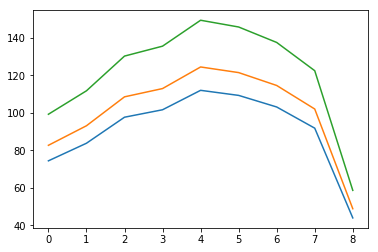

In [99]:

lifetimeCohorts = [[0, 6], [6,12],[12,18],[18,50]] #seconds

binSize = 700/9
yBins = [   0. , 77.77777778 , 155.55555556 , 233.33333333 , 311.11111111 ,
  388.88888889 , 466.66666667 , 544.44444444 , 622.22222222 , 700.        ]
zTresholds_apibaso = [ 117.30371435,  106.8935544 ,   91.49227078,   87.08214307,
         75.58176287,   78.57998916,   85.43989849,   97.97795952,
        151.08614626]  #px
#it is actually curved the opposite way!
zTresholds_apibaso = abs(np.array(zTresholds_apibaso)-200)
zTresholds_api =0.9* np.array([  82.69628565  , 93.1064456 ,  108.50772922  ,112.91785693  ,124.41823713,
  121.42001084 , 114.56010151,  102.02204048  , 48.91385374])
zTresholds_baso =1.2* np.array([  82.69628565  , 93.1064456 ,  108.50772922  ,112.91785693  ,124.41823713,
  121.42001084 , 114.56010151,  102.02204048  , 48.91385374])
print(zTresholds_apibaso)
plt.plot(zTresholds_api)
plt.plot(zTresholds_apibaso)
plt.plot(zTresholds_baso)
#x: 92.8856 z:91.44027, zThreshold: 107.59988712 baso: True
#x: 304.9034 z:145.3133, zThreshold: 87.9015554 baso: False

In [100]:
# data preprocessing

# take only those tracks that belong to the cohort:

#initialize the trackId array sorted by lifetime cohort
trackIdsAssignedToCohorts_api = []
trackIdsAssignedToCohorts_inter = []
trackIdsAssignedToCohorts_baso = []
for i in range(0,len(lifetimeCohorts)):
    trackIdsAssignedToCohorts_api.append(np.array([]))
    trackIdsAssignedToCohorts_inter.append(np.array([]))
    trackIdsAssignedToCohorts_baso.append(np.array([]))


trackIdsUsed = cat_Ia_Tracks_long
baso = False

basoFirstYZ=[]
basoLifetimes=[]
baso_mAmplitude=[] 
baso_sAmplitude=[]  
apiFirstYZ=[]
apiLifetimes=[]
api_mAmplitude=[]
api_sAmplitude=[]
interFirstYZ=[]
interLifetimes=[]
inter_mAmplitude=[]
inter_sAmplitude=[]
condition = -1 #0,1,2; api,inter,baso
for trackId in trackIdsUsed:
    track = data[data['trackId'] == trackId]
    tracklength = track['tracklength'].values[0]
    m_intensity = track['m_A'].values.astype(float)
    s_intensity = track['s_A'].values.astype(float)
    maxIdx = np.argmax(s_intensity)
    # only include those tracks that do not have the dynamin peak in the first three frames
    
    m_firstY = track['m_y'].values.astype(float)[0]
    m_firstZ = track['m_z'].values.astype(float)[0]
    m_firstY_idxInBins = int(np.floor(m_firstY/binSize))
    #print(m_firstY_idxInBins)
    zThreshold_apibaso =  zTresholds_apibaso[m_firstY_idxInBins]
    zThreshold_api = zTresholds_api[m_firstY_idxInBins]
    zThreshold_baso = zTresholds_baso[m_firstY_idxInBins]
    if(m_firstZ < zThreshold_api):
        condition = 0
        apiFirstYZ.append([m_firstY,m_firstZ])
        apiLifetimes.append(tracklength)
        api_mAmplitude.append(m_intensity)
        api_sAmplitude.append(s_intensity)
    else:
        if(m_firstZ > zThreshold_baso):
            condition = 1
            basoFirstYZ.append([m_firstY,m_firstZ])
            basoLifetimes.append(tracklength)
            baso_mAmplitude.append(m_intensity)
            baso_sAmplitude.append(s_intensity)
        else:
            condition=2
            interFirstYZ.append([m_firstY,m_firstZ])
            interLifetimes.append(tracklength)
            inter_mAmplitude.append(m_intensity)
            inter_sAmplitude.append(s_intensity)
            

                
        
    #print("y: {} z:{}, zThreshold: {} baso: {}".format(m_firstY,m_firstZ,zThreshold_apibaso,baso) )
    if(maxIdx >3):
#    if(True):
    
        for i in range(0,len(lifetimeCohorts)):
        
            if((tracklength >lifetimeCohorts[i][0]) & (tracklength <lifetimeCohorts[i][1])):
                if(condition==0):
                    trackIdsAssignedToCohorts_api[i] = np.append(trackIdsAssignedToCohorts_api[i],trackId)
                if(condition==1):
                    trackIdsAssignedToCohorts_inter[i] = np.append(trackIdsAssignedToCohorts_inter[i],trackId)
                if(condition==2):
                    trackIdsAssignedToCohorts_baso[i] = np.append(trackIdsAssignedToCohorts_baso[i],trackId)
trackIdsAssignedToCohorts_api = np.array(trackIdsAssignedToCohorts_api)
trackIdsAssignedToCohorts_inter = np.array(trackIdsAssignedToCohorts_inter)
trackIdsAssignedToCohorts_baso = np.array(trackIdsAssignedToCohorts_baso)

print(trackIdsAssignedToCohorts_api)
api_cohorts_n = []
for cohortIdArray in trackIdsAssignedToCohorts_api:
    print(len(cohortIdArray))
    api_cohorts_n.append(len(cohortIdArray))
    
print(trackIdsAssignedToCohorts_inter)
inter_cohorts_n = []
for cohortIdArray in trackIdsAssignedToCohorts_inter:
    print(len(cohortIdArray))
    inter_cohorts_n.append(len(cohortIdArray))
    
print(trackIdsAssignedToCohorts_baso)
baso_cohorts_n = []
for cohortIdArray in trackIdsAssignedToCohorts_baso:
    print(len(cohortIdArray))
    baso_cohorts_n.append(len(cohortIdArray))
    
    

[ array([ 10840.,  10848.,  10854.,  10865.,  10886.,  10895.,  10899.,
        10902.,  10924.,  10929.,  10930.,  10931.,  10933.,  10938.,
        10940.,  10942.,  10969.,  10972.,  10974.,  10983.,  10984.,
        10998.,  11001.,  11008.,  11014.,  11017.,  11022.,  11030.,
        11054.,  11058.,  11063.,  11079.,  11090.,  11092.,  11094.,
        11097.,  11102.,  11105.,  11123.,  11126.,  11127.,  11138.,
        11140.,  11142.,  11143.,  11150.,  11156.,  11158.,  11165.,
        11175.,  11177.,  11181.,  11202.,  11207.,  11208.,  11210.,
        11212.,  11232.,  11234.,  11237.,  11262.,  11264.,  11273.,
        11292.,  11297.,  11298.,  11302.,  11311.,  11314.,  11319.,
        11321.,  11322.,  11326.,  11327.,  11346.,  11349.,  11351.,
        11352.,  11366.,  11373.,  11386.,  11389.,  11390.,  11391.,
        11392.,  11393.,  11397.,  11398.,  11400.,  11416.,  11417.,
        11422.,  11423.,  11424.,  11427.,  11437.,  11453.,  11456.,
        11463.,  1

Text(0,0.5,'z[px]')

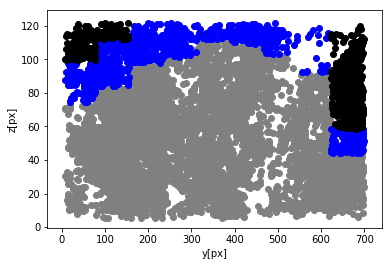

In [101]:

plt.scatter(np.array(apiFirstYZ)[:,0],np.array(apiFirstYZ)[:,1],c='grey')
plt.scatter(np.array(interFirstYZ)[:,0],np.array(interFirstYZ)[:,1],c='blue')
plt.scatter(np.array(basoFirstYZ)[:,0],np.array(basoFirstYZ)[:,1],c='k')
plt.xlabel('y[px]')
plt.ylabel('z[px]')

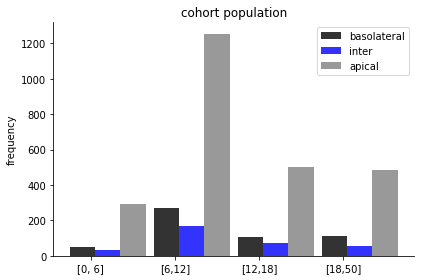

In [102]:
# data to plot
n_groups = 4
A = (baso_cohorts_n[0], baso_cohorts_n[1],baso_cohorts_n[2],baso_cohorts_n[3])
C = (inter_cohorts_n[0], inter_cohorts_n[1],inter_cohorts_n[2],inter_cohorts_n[3])
B = (api_cohorts_n[0], api_cohorts_n[1],api_cohorts_n[2],api_cohorts_n[3])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, A, bar_width,
                 alpha=opacity,
                 color='k',
                 label='basolateral')

rects1 = plt.bar(index +1*bar_width, C, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='inter')
 
rects3 = plt.bar(index +2*bar_width, B, bar_width,
                 alpha=opacity,
                 color='grey',
                 label='apical')


 
#plt.xlabel('Person')
plt.ylabel('frequency')
plt.title('cohort population')
plt.xticks(index + bar_width/3, ('[0, 6]', '[6,12]','[12,18]', '[18,50]'))

plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
 
plt.tight_layout()
plt.show()


In [103]:
print(len(trackIdsUsed))

7630


Text(0,0.5,'frequency')

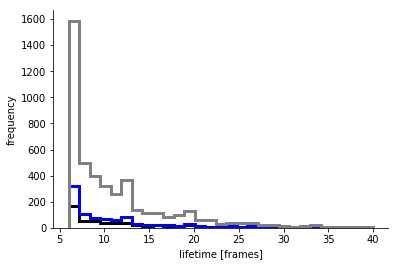

In [104]:
#plt.plot(basoLifetimes)
#plt.plot(apiLifetimes)
plt.hist(basoLifetimes,histtype='step',linewidth=3,color='k',bins=np.linspace(6, 40, 30));
plt.hist(interLifetimes,histtype='step',linewidth=3,color='blue',bins=np.linspace(6, 40, 30));
plt.hist(apiLifetimes,histtype='step',linewidth=3,color='grey',bins=np.linspace(6, 40, 30));
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('lifetime [frames]')
plt.ylabel('frequency')

In [105]:
def flattenList(array):
    return[item for sublist in array for item in sublist]


Text(0,0.5,'frequency')

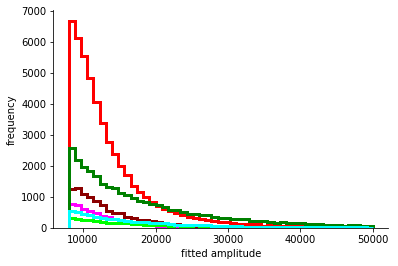

In [106]:
plt.hist(flattenList(baso_mAmplitude),histtype='step',linewidth=3,color='magenta',bins=np.linspace(8000, 50000, 50));
plt.hist(flattenList(api_mAmplitude),histtype='step',linewidth=3,color='red',bins=np.linspace(8000, 50000, 50));#,bins=np.linspace(6, 60, 50));
plt.hist(flattenList(inter_mAmplitude),histtype='step',linewidth=3,color='darkred',bins=np.linspace(8000, 50000, 50));#,bins=np.linspace(6, 60, 50));
#plt.hist(api_mAmplitude,histtype='step')#,bins=np.linspace(6, 60, 50));
plt.hist(flattenList(baso_sAmplitude),histtype='step',linewidth=3,color='lime',bins=np.linspace(8000, 50000, 50));
plt.hist(flattenList(api_sAmplitude),histtype='step',linewidth=3,color='green',bins=np.linspace(8000, 50000, 50));#
plt.hist(flattenList(inter_sAmplitude),histtype='step',linewidth=3,color='cyan',bins=np.linspace(8000, 50000, 50));#
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('fitted amplitude')
plt.ylabel('frequency')

Text(0,0.5,'frequency')

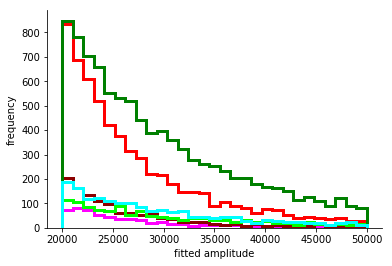

In [107]:
plt.hist(flattenList(baso_mAmplitude),histtype='step',linewidth=3,color='magenta',bins=np.linspace(20000, 50000, 30));
plt.hist(flattenList(api_mAmplitude),histtype='step',linewidth=3,color='red',bins=np.linspace(20000, 50000, 30));#,bins=np.linspace(6, 60, 50));
plt.hist(flattenList(inter_mAmplitude),histtype='step',linewidth=3,color='darkred',bins=np.linspace(20000, 50000, 30));#,bins=np.linspace(6, 60, 50));
#plt.hist(api_mAmplitude,histtype='step')#,bins=np.linspace(6, 60, 50));
plt.hist(flattenList(baso_sAmplitude),histtype='step',linewidth=3,color='lime',bins=np.linspace(20000, 50000, 30));
plt.hist(flattenList(api_sAmplitude),histtype='step',linewidth=3,color='green',bins=np.linspace(20000, 50000, 30));#
plt.hist(flattenList(inter_sAmplitude),histtype='step',linewidth=3,color='cyan',bins=np.linspace(20000, 50000, 30));#
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('fitted amplitude')
plt.ylabel('frequency')

In [108]:


def createBufferForLifetimeCohort(listOfTrackIdsAssignedToCohort,    backgroundIntensity ):


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    m_buffer = []
    s_buffer = []
    
    bufferSize = 200
    bufferZero = 100

    
    m_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    
    
    #for i in range(0,bufferSize):
    #    m_buffer.append([])
    #    s_buffer.append([])
        
    counter = 0
    
    for trackId in trackIdArray:
        track = data[data['trackId'] == trackId]
        tracklength = track['tracklength'].values[0]
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        maxIdx = np.argmax(s_intensity)
        
    
        for i in range(0,len(track)):
            if(not np.isnan(m_intensity[i])):
                m_buffer[counter][bufferZero-maxIdx+i]=(m_intensity[i])
            if(not np.isnan(s_intensity[i])):
                s_buffer[counter][bufferZero-maxIdx+i]=(s_intensity[i])
           
                
        counter = counter+1;
    
    
    return (m_buffer,s_buffer)



In [109]:


def createBufferForLifetimeCohort_normalized(listOfTrackIdsAssignedToCohort,    backgroundIntensity ):


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    m_buffer = []
    s_buffer = []
    
    bufferSize = 200
    bufferZero = 100

    
    m_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    
    
    #for i in range(0,bufferSize):
    #    m_buffer.append([])
    #    s_buffer.append([])
        
    counter = 0
    
    for trackId in trackIdArray:
        track = data[data['trackId'] == trackId]
        tracklength = track['tracklength'].values[0]
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        maxIdx = np.argmax(s_intensity)
        m_maxIntensity = np.nanmax(m_intensity)
        s_maxIntensity = np.nanmax(s_intensity)
        
    
        for i in range(0,len(track)):
            if(not np.isnan(m_intensity[i])):
                m_buffer[counter][bufferZero-maxIdx+i]=(m_intensity[i])/m_maxIntensity
            if(not np.isnan(s_intensity[i])):
                valueToPut = (s_intensity[i])/s_maxIntensity
                #print(valueToPut)
                s_buffer[counter][bufferZero-maxIdx+i]=(s_intensity[i])/s_maxIntensity
                #print(s_buffer[counter])
                
        counter = counter+1;
    
    
    return (m_buffer,s_buffer)


# apical

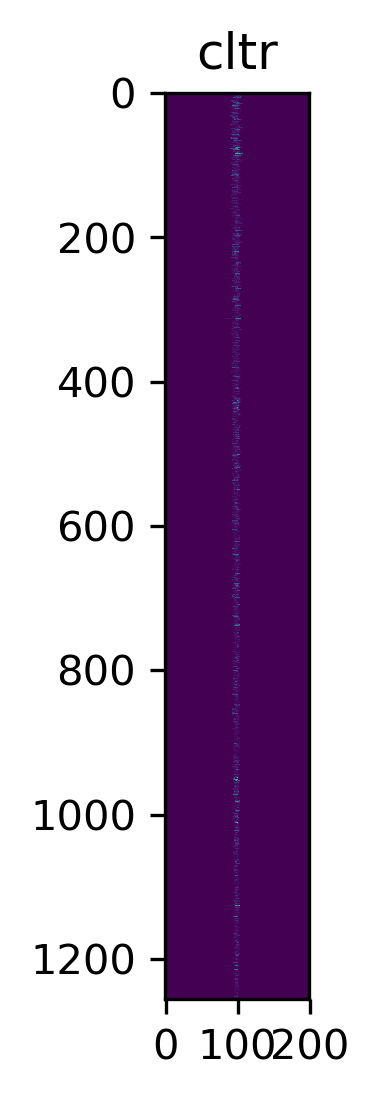

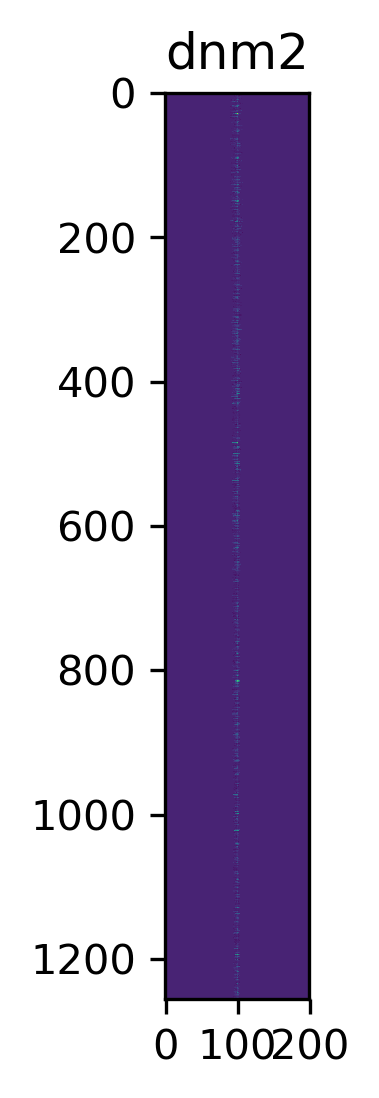

In [110]:
#calculate all the buffers for all cohorts
backgroundIntensity = 7000

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForLifetimeCohort(trackIdsAssignedToCohorts_api[i],backgroundIntensity)
    cohortBuffers.append([m_buffer,s_buffer])

m_buffer,s_buffer = cohortBuffers[1]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

Text(0.5,1,'Apical')

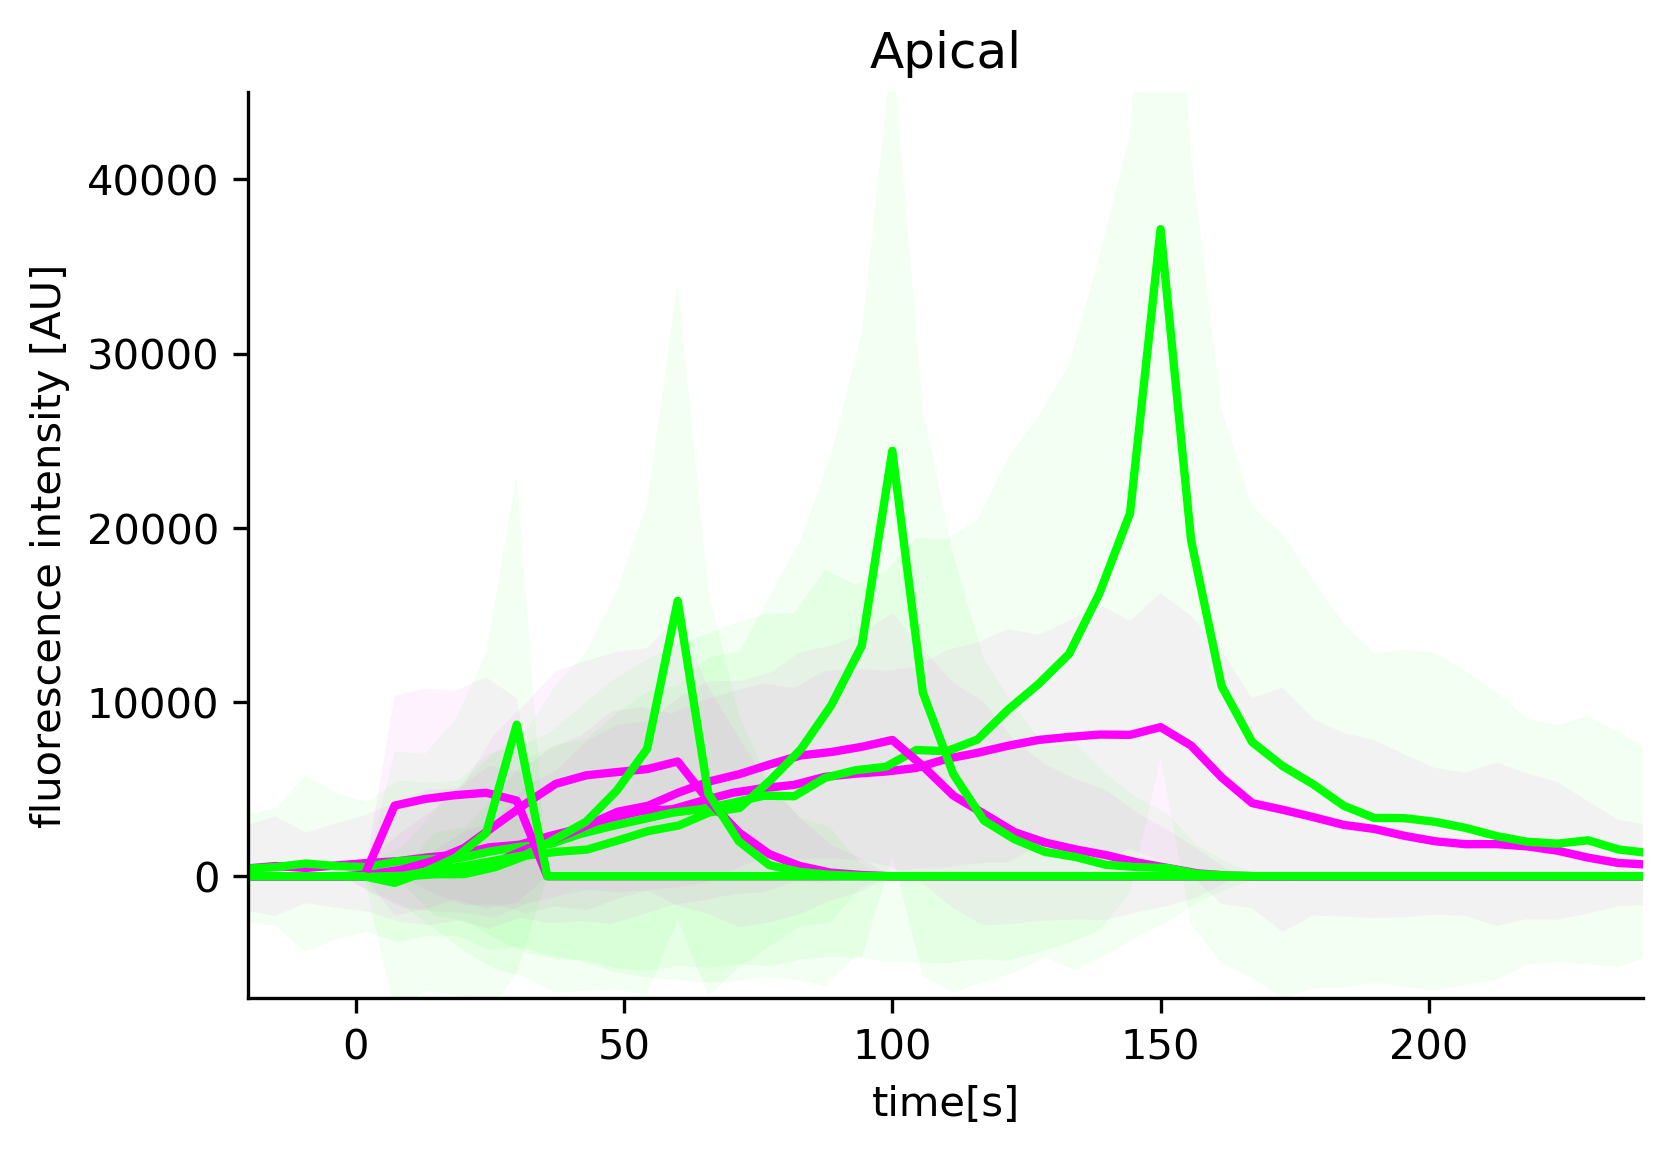

In [111]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,240)
plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('fluorescence intensity [AU]')
plt.title('Apical')

7000


Text(0,0.5,'fluorescence intensity [AU]')

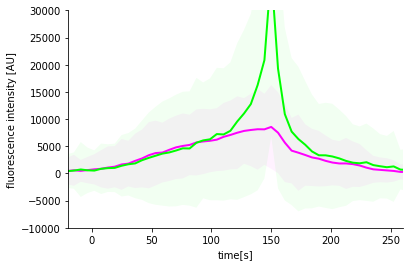

In [112]:
cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]
print(backgroundIntensity)
m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)
plt.xlim(-20,260)
plt.ylim(-10000,30000)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('time[s]')
plt.ylabel('fluorescence intensity [AU]')

# basolateral

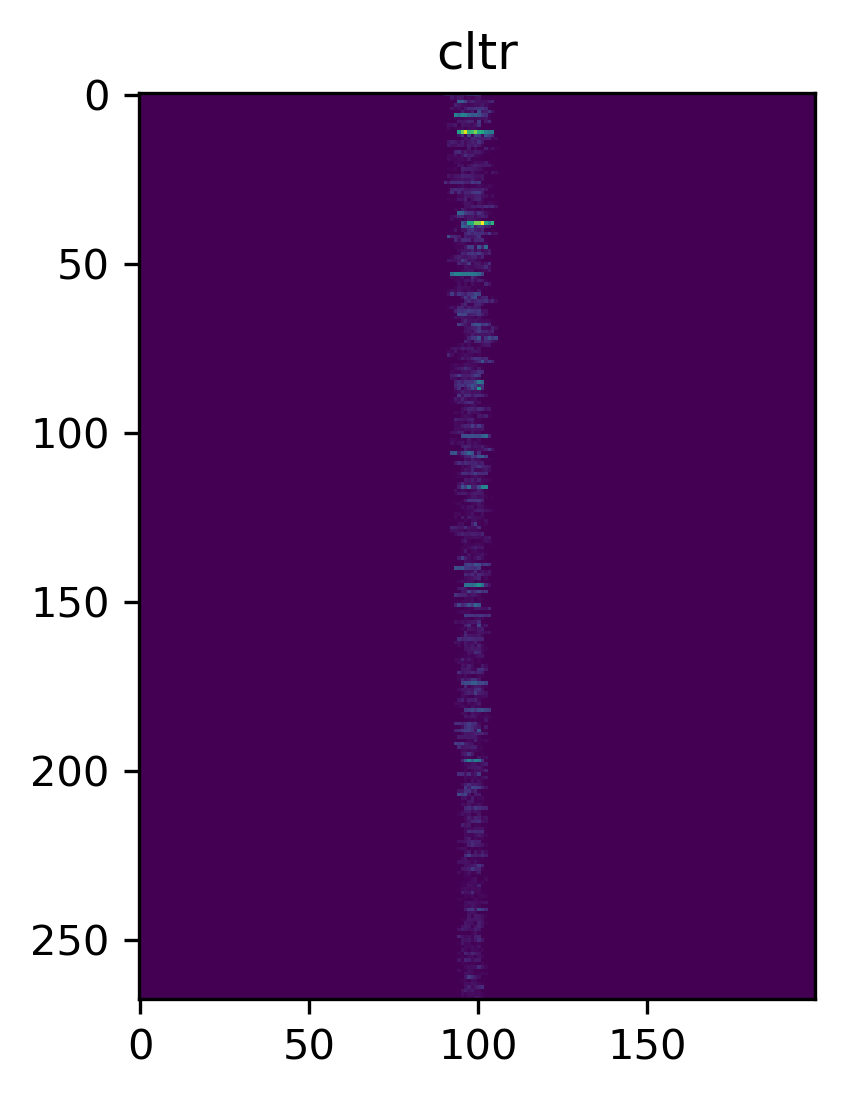

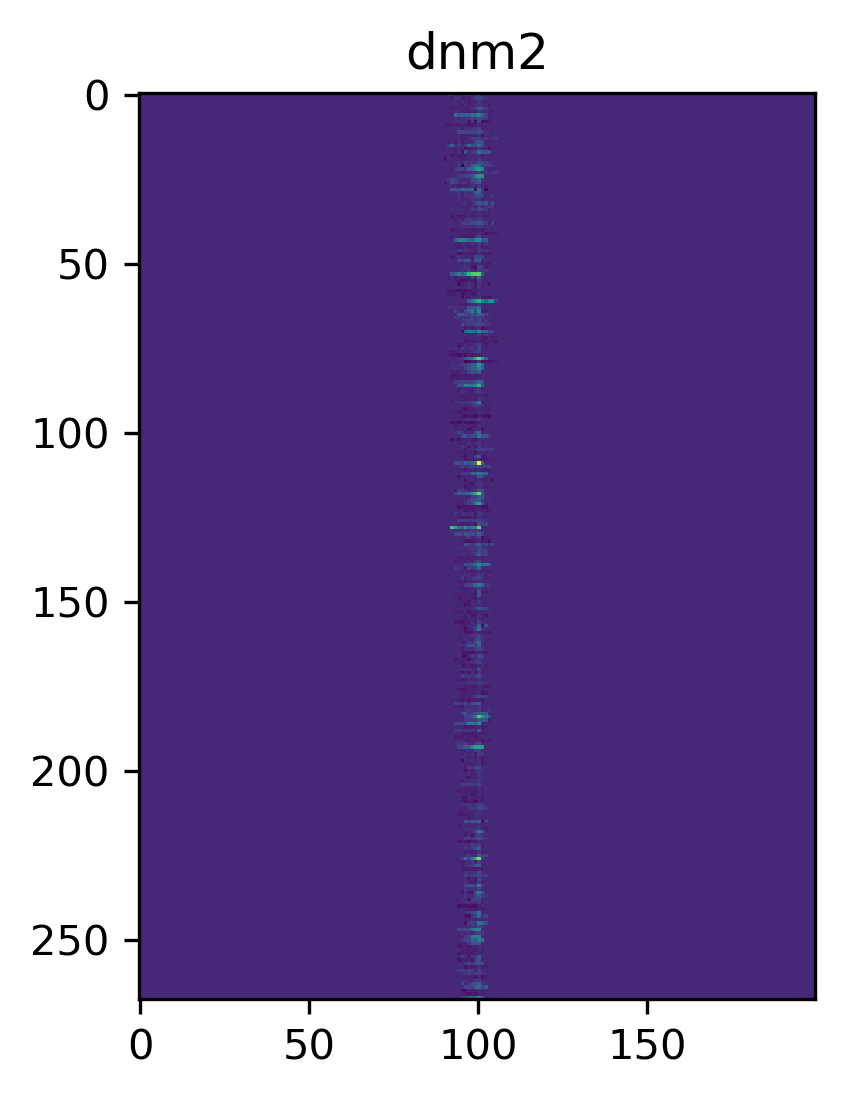

In [113]:
#calculate all the buffers for all cohorts
backgroundIntensity = 7000

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForLifetimeCohort(trackIdsAssignedToCohorts_baso[i],backgroundIntensity)
    cohortBuffers.append([m_buffer,s_buffer])

m_buffer,s_buffer = cohortBuffers[1]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

Text(0.5,1,'Basolateral')

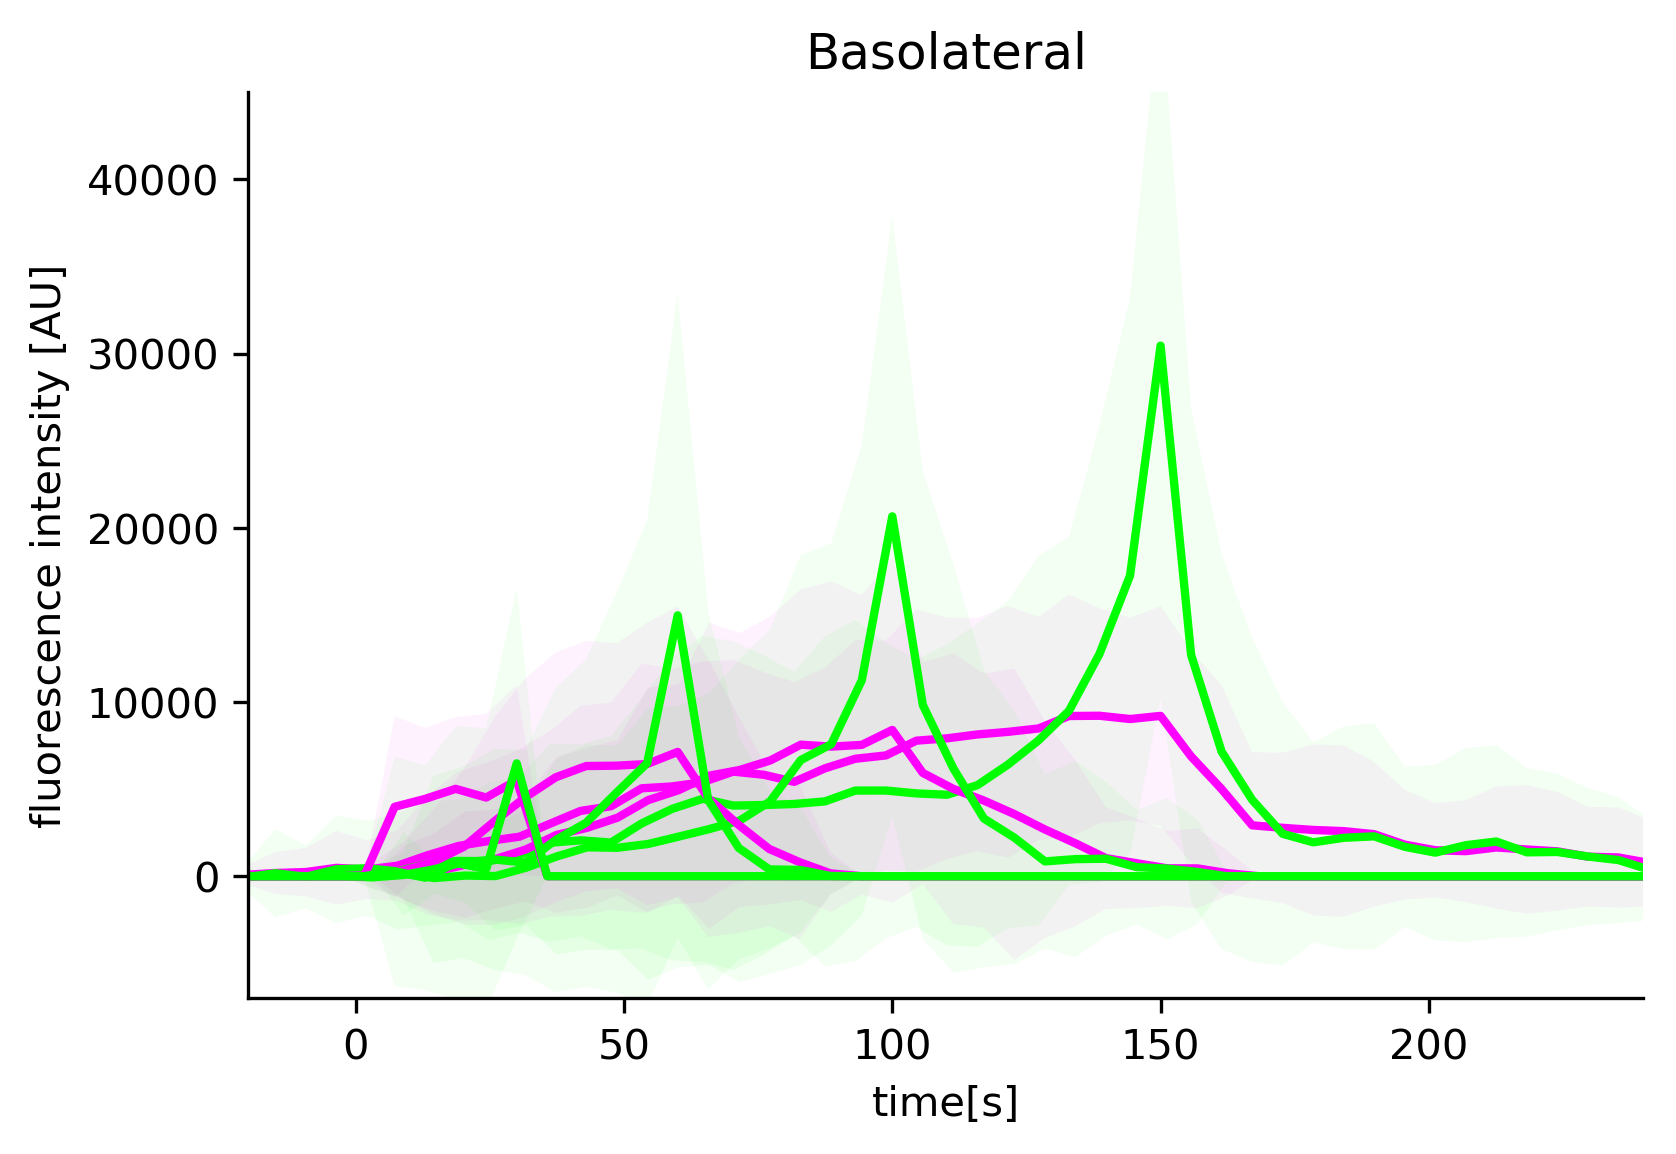

In [114]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,240)
plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('fluorescence intensity [AU]')
plt.title('Basolateral')

# inter

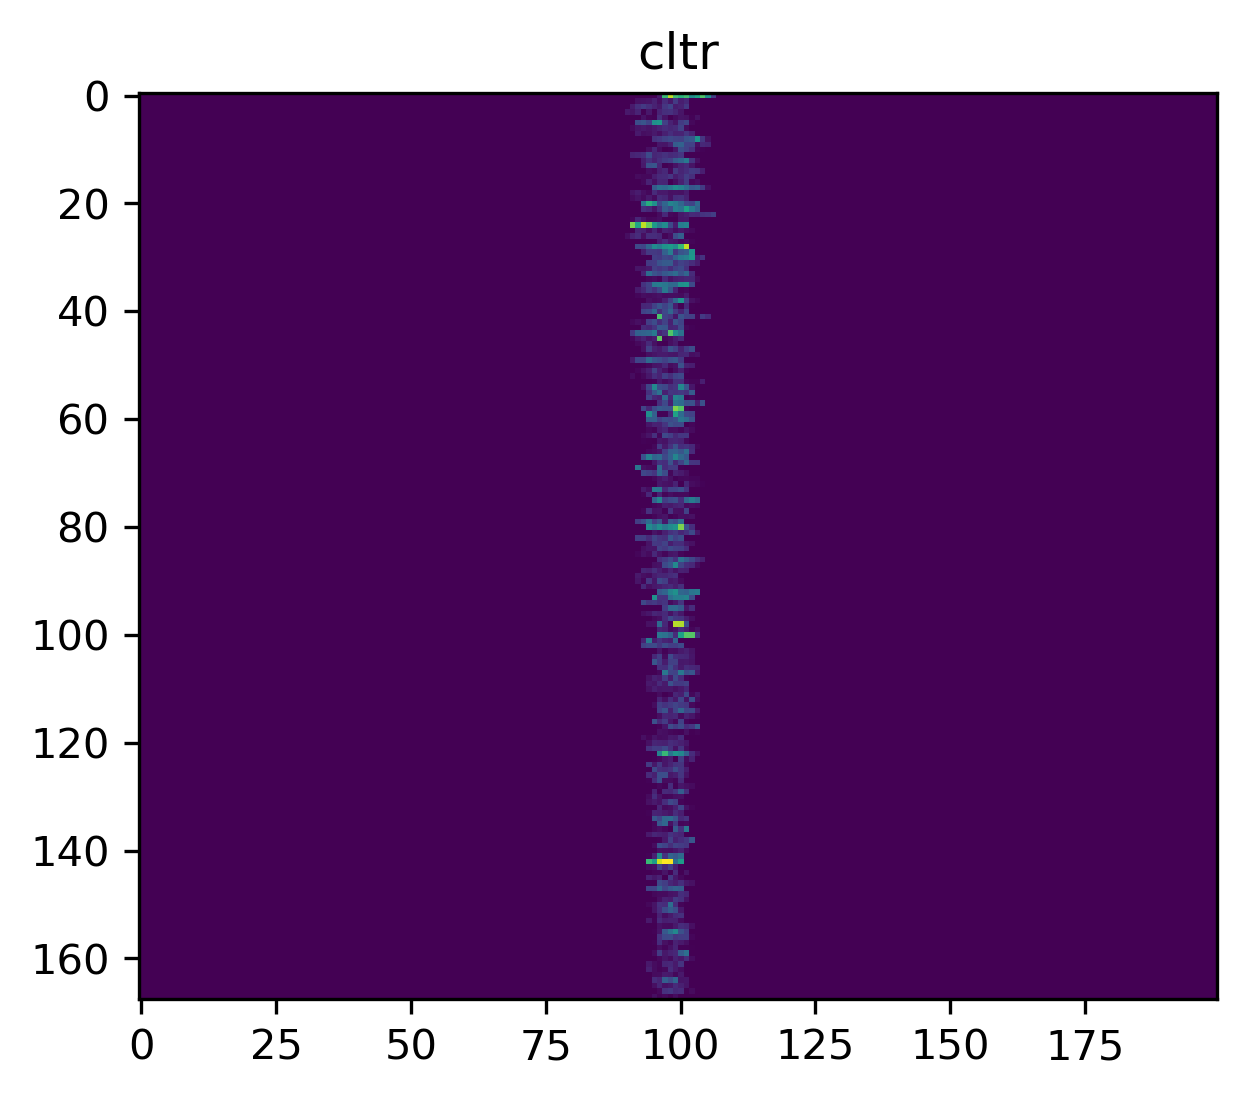

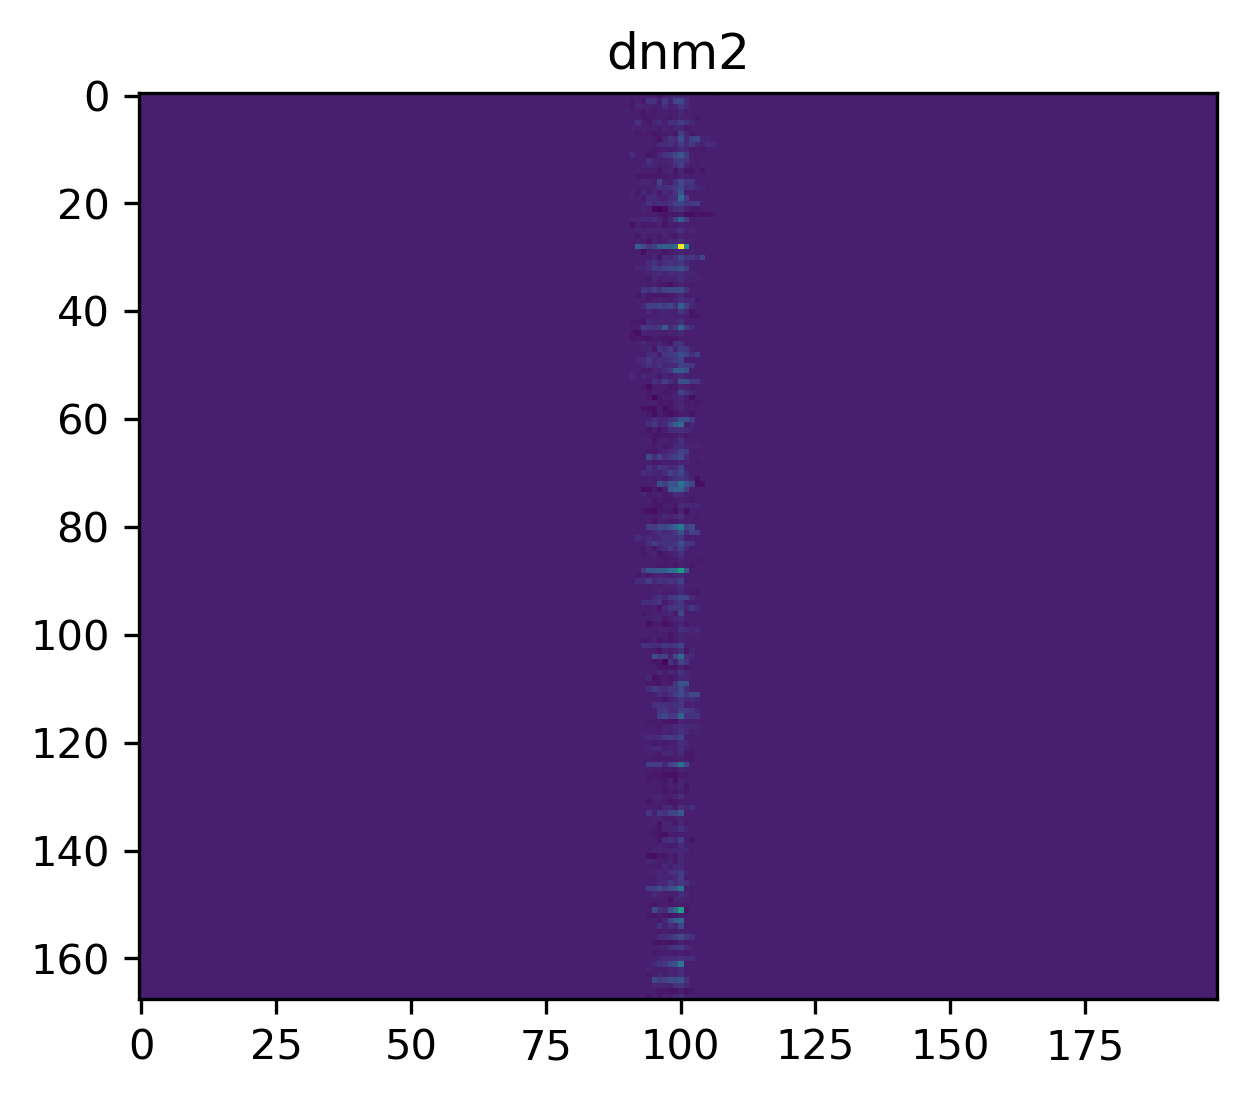

In [115]:
#calculate all the buffers for all cohorts
backgroundIntensity = 7000

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForLifetimeCohort(trackIdsAssignedToCohorts_inter[i],backgroundIntensity)
    cohortBuffers.append([m_buffer,s_buffer])

m_buffer,s_buffer = cohortBuffers[1]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

Text(0.5,1,'Inter')

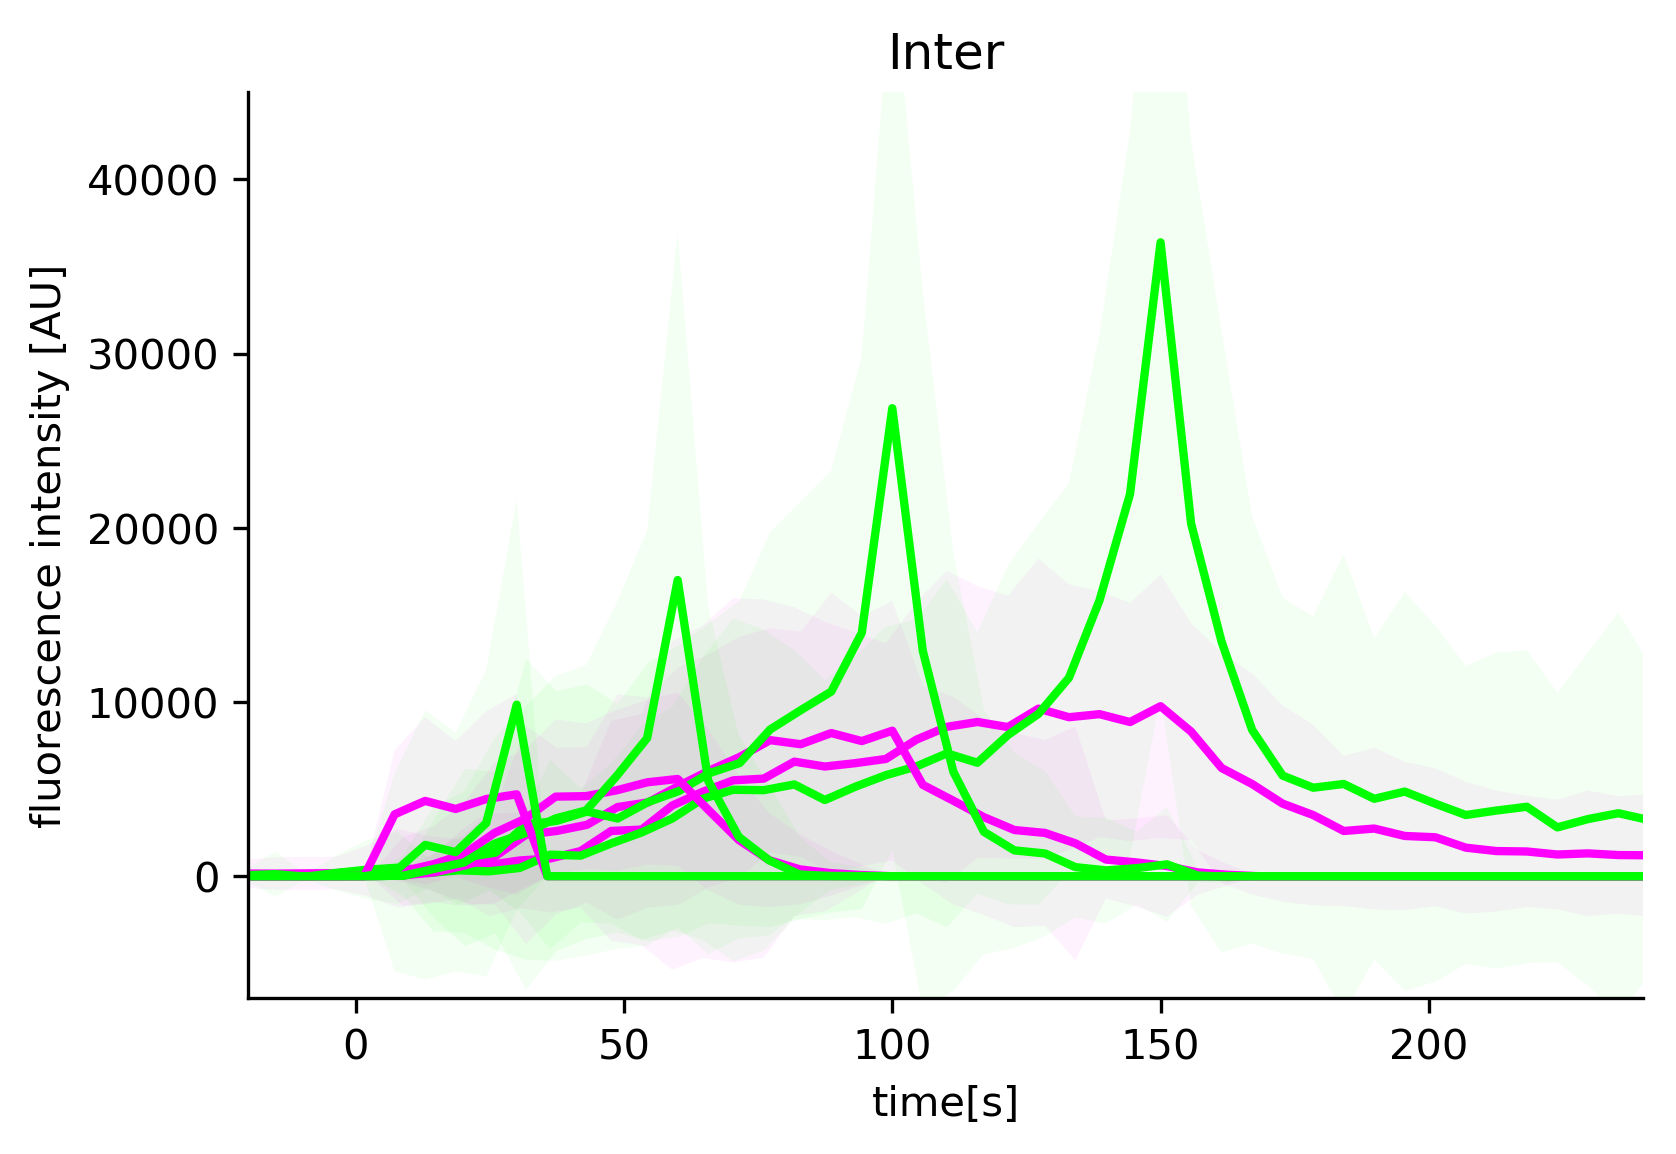

In [116]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,240)
plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('fluorescence intensity [AU]')
plt.title('Inter')

In [58]:
# taking only the real values

In [59]:
def avgAllColumns_ignoreValue(twoDArray,ignoredValue,replacementValue):
    len_ax1 = len(twoDArray[0])
    len_ax0 = len(twoDArray)
    print("len_ax0 "+str(len_ax0))
    print("len_ax1 "+str(len_ax1))
    result = []
    for i in range(0,len_ax1):
#        print(i)
        column = twoDArray[:,i]
#        print(column)
        excludedColumn = column[column != ignoredValue]
#        print(excludedColumn)
        if(len(excludedColumn) == 0):
            result.append(replacementValue)
        else:
            result.append(np.nanmean(excludedColumn))
    result = np.array(result)
    return result

In [60]:
def stdAllColumns_ignoreValue(twoDArray,ignoredValue,replacementValue):
    len_ax1 = len(twoDArray[0])
    len_ax0 = len(twoDArray)
    print("len_ax0 "+str(len_ax0))
    print("len_ax1 "+str(len_ax1))
    result = []
    for i in range(0,len_ax1):
#        print(i)
        column = twoDArray[:,i]
#        print(column)
        excludedColumn = column[column != ignoredValue]
#        print(excludedColumn)
        if(len(excludedColumn) == 0):
            result.append(replacementValue)
        else:
            result.append(np.nanstd(excludedColumn))
    result = np.array(result)
    return result

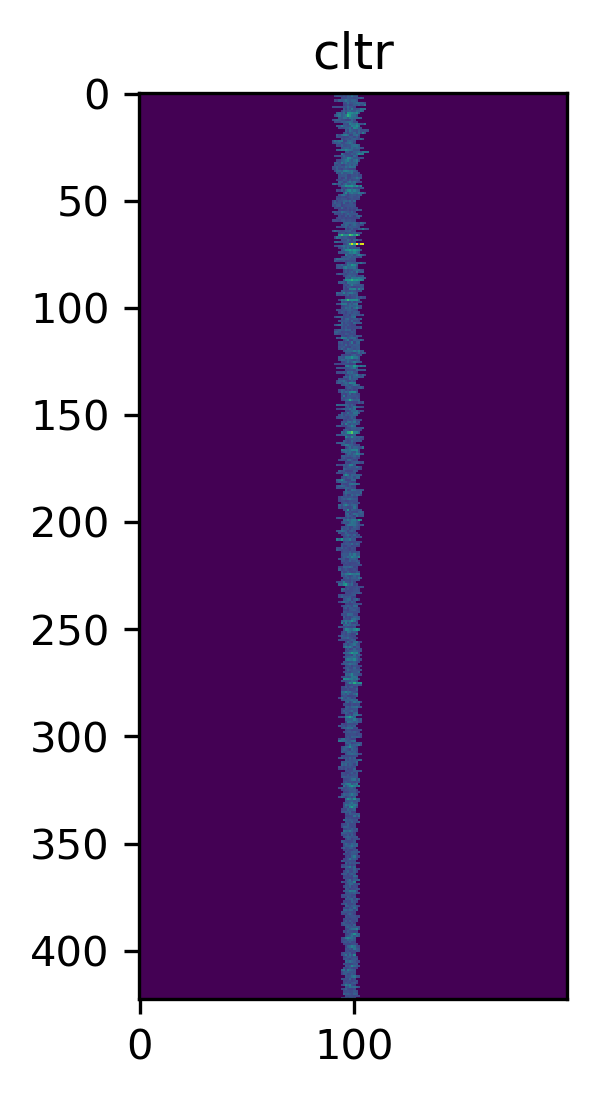

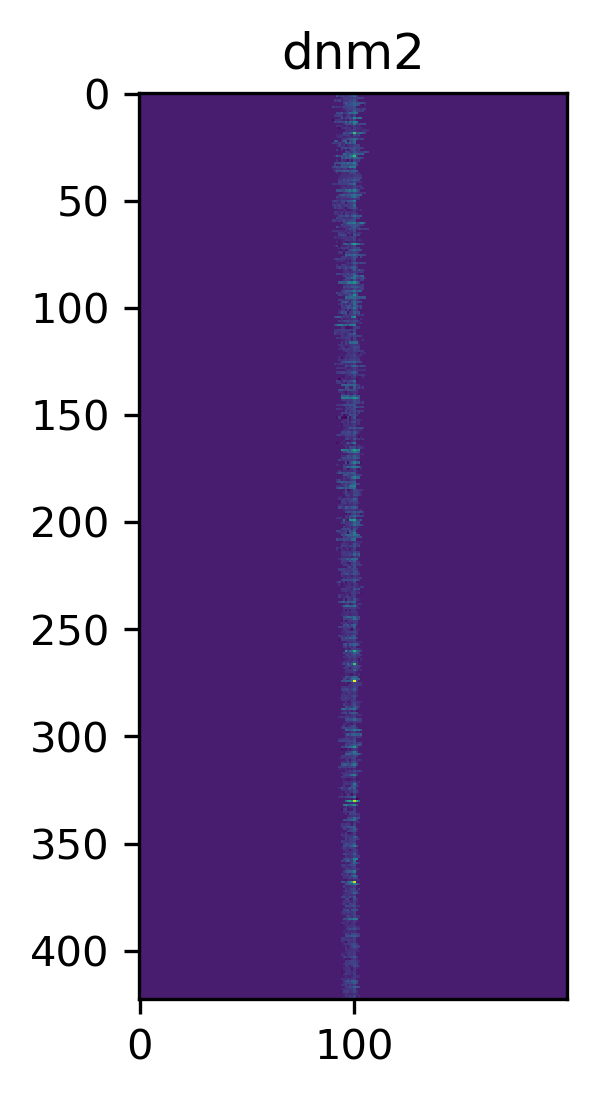

In [66]:
#calculate all the buffers for all cohorts
backgroundIntensity = -1

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForLifetimeCohort(trackIdsAssignedToCohorts[i],backgroundIntensity)
    cohortBuffers.append([m_buffer,s_buffer])

m_buffer,s_buffer = cohortBuffers[1]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

len_ax0 82
len_ax1 200
len_ax0 82
len_ax1 200
len_ax0 82
len_ax1 200
len_ax0 82
len_ax1 200
len_ax0 144
len_ax1 200
len_ax0 144
len_ax1 200
len_ax0 144
len_ax1 200
len_ax0 144
len_ax1 200
len_ax0 423
len_ax1 200
len_ax0 423
len_ax1 200
len_ax0 423
len_ax1 200
len_ax0 423
len_ax1 200
len_ax0 101
len_ax1 200
len_ax0 101
len_ax1 200
len_ax0 101
len_ax1 200
len_ax0 101
len_ax1 200


Text(0,0.5,'distance from start [px]')

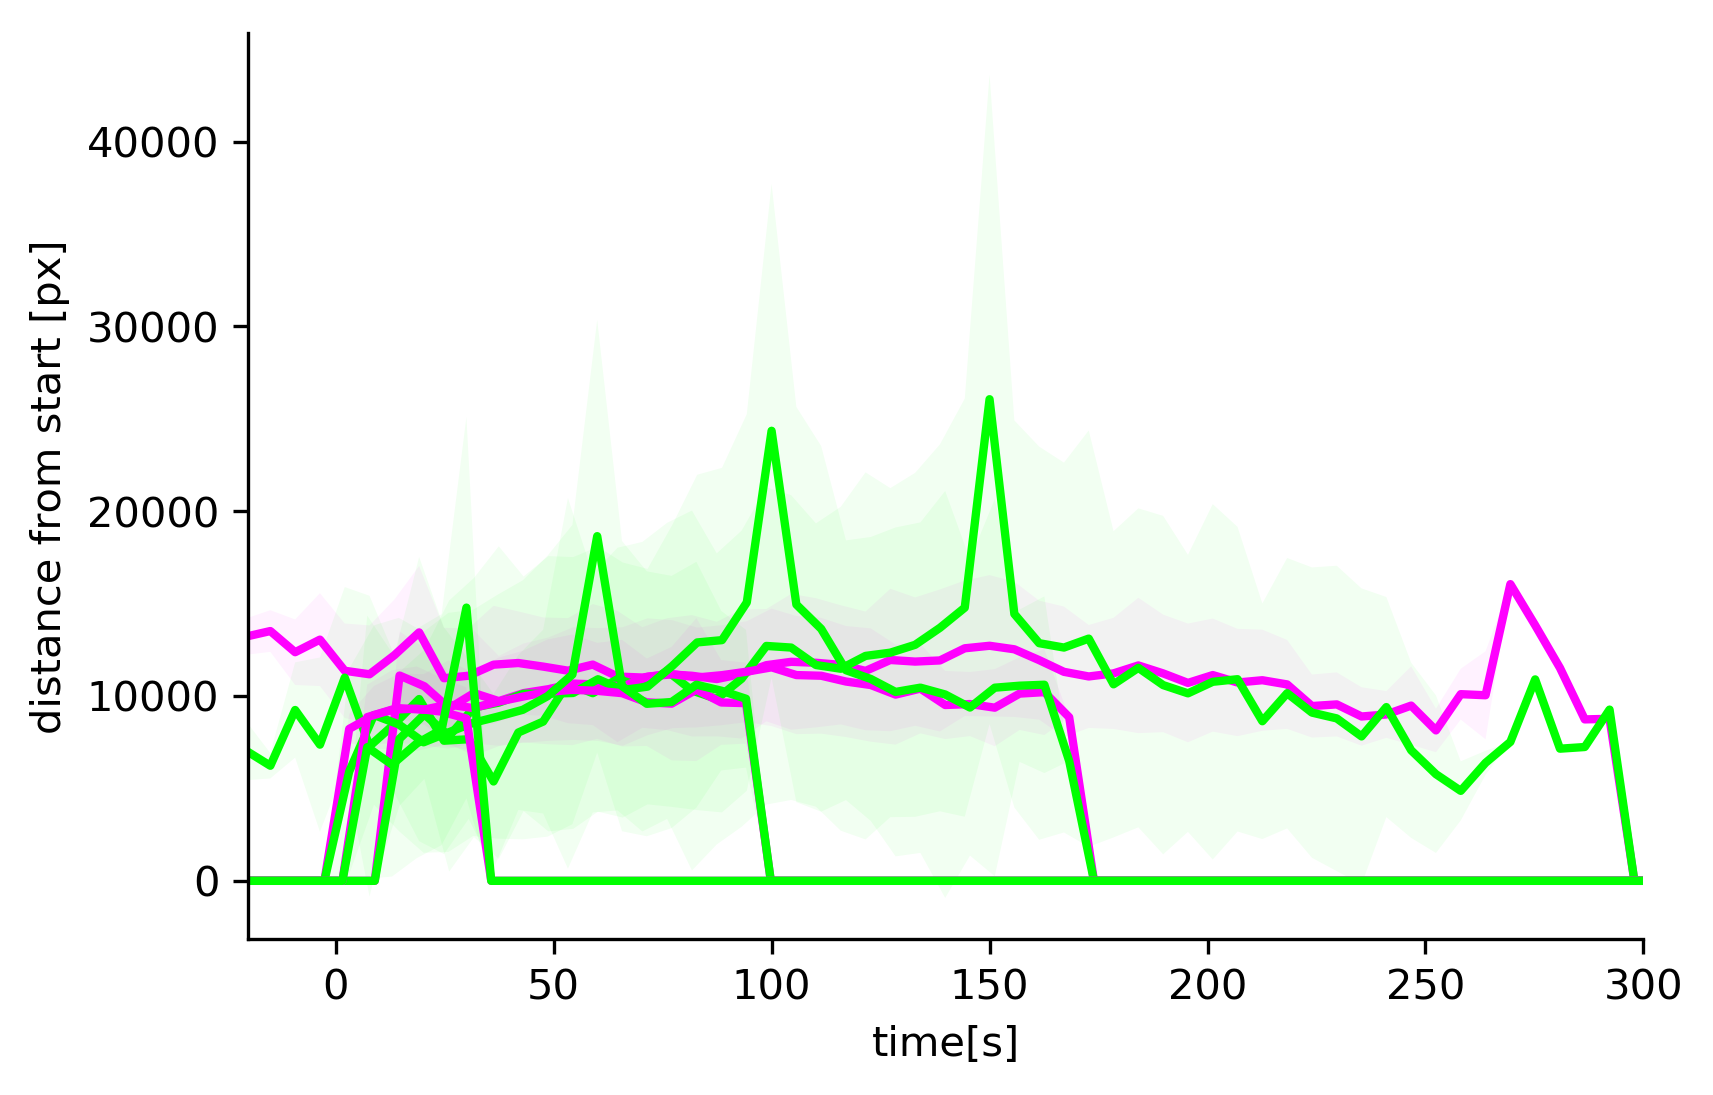

In [67]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100



timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,300)
#plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('distance from start [px]')

In [ ]:
# normalize before putting into cohorts

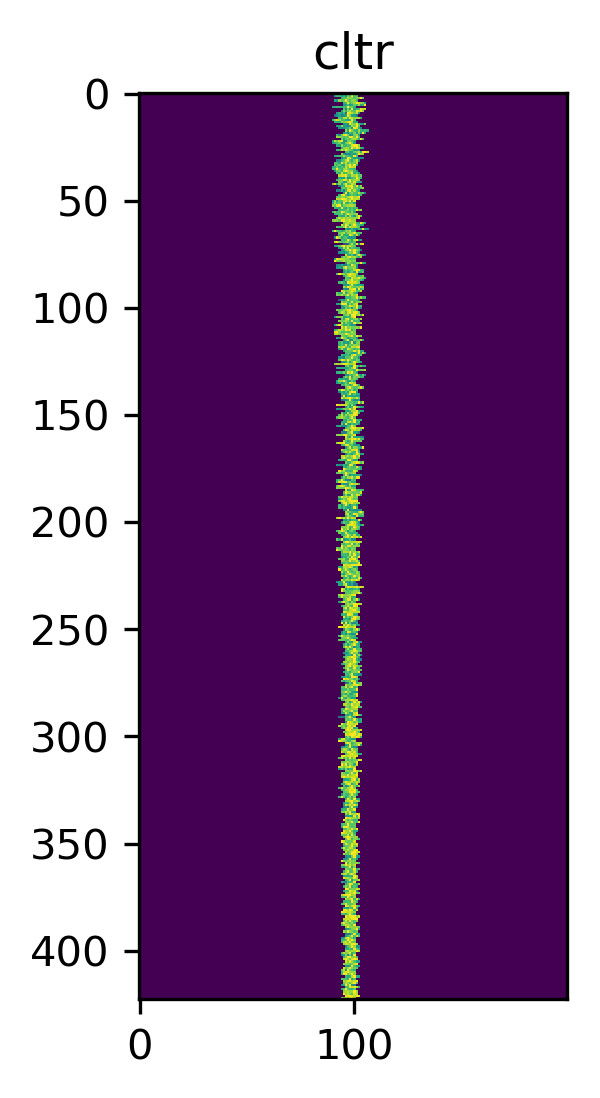

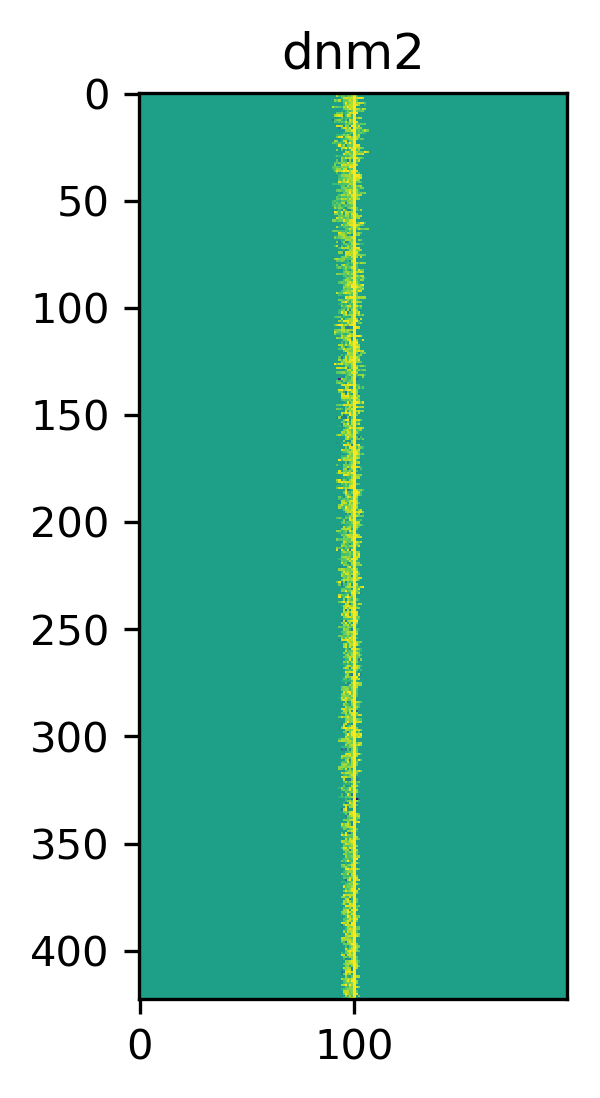

In [53]:
#calculate all the buffers for all cohorts
backgroundIntensity = 0

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForLifetimeCohort_normalized(trackIdsAssignedToCohorts[i],backgroundIntensity)
    cohortBuffers.append([m_buffer,s_buffer])

m_buffer,s_buffer = cohortBuffers[1]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

Text(0,0.5,'fluorescence intensity [AU]')

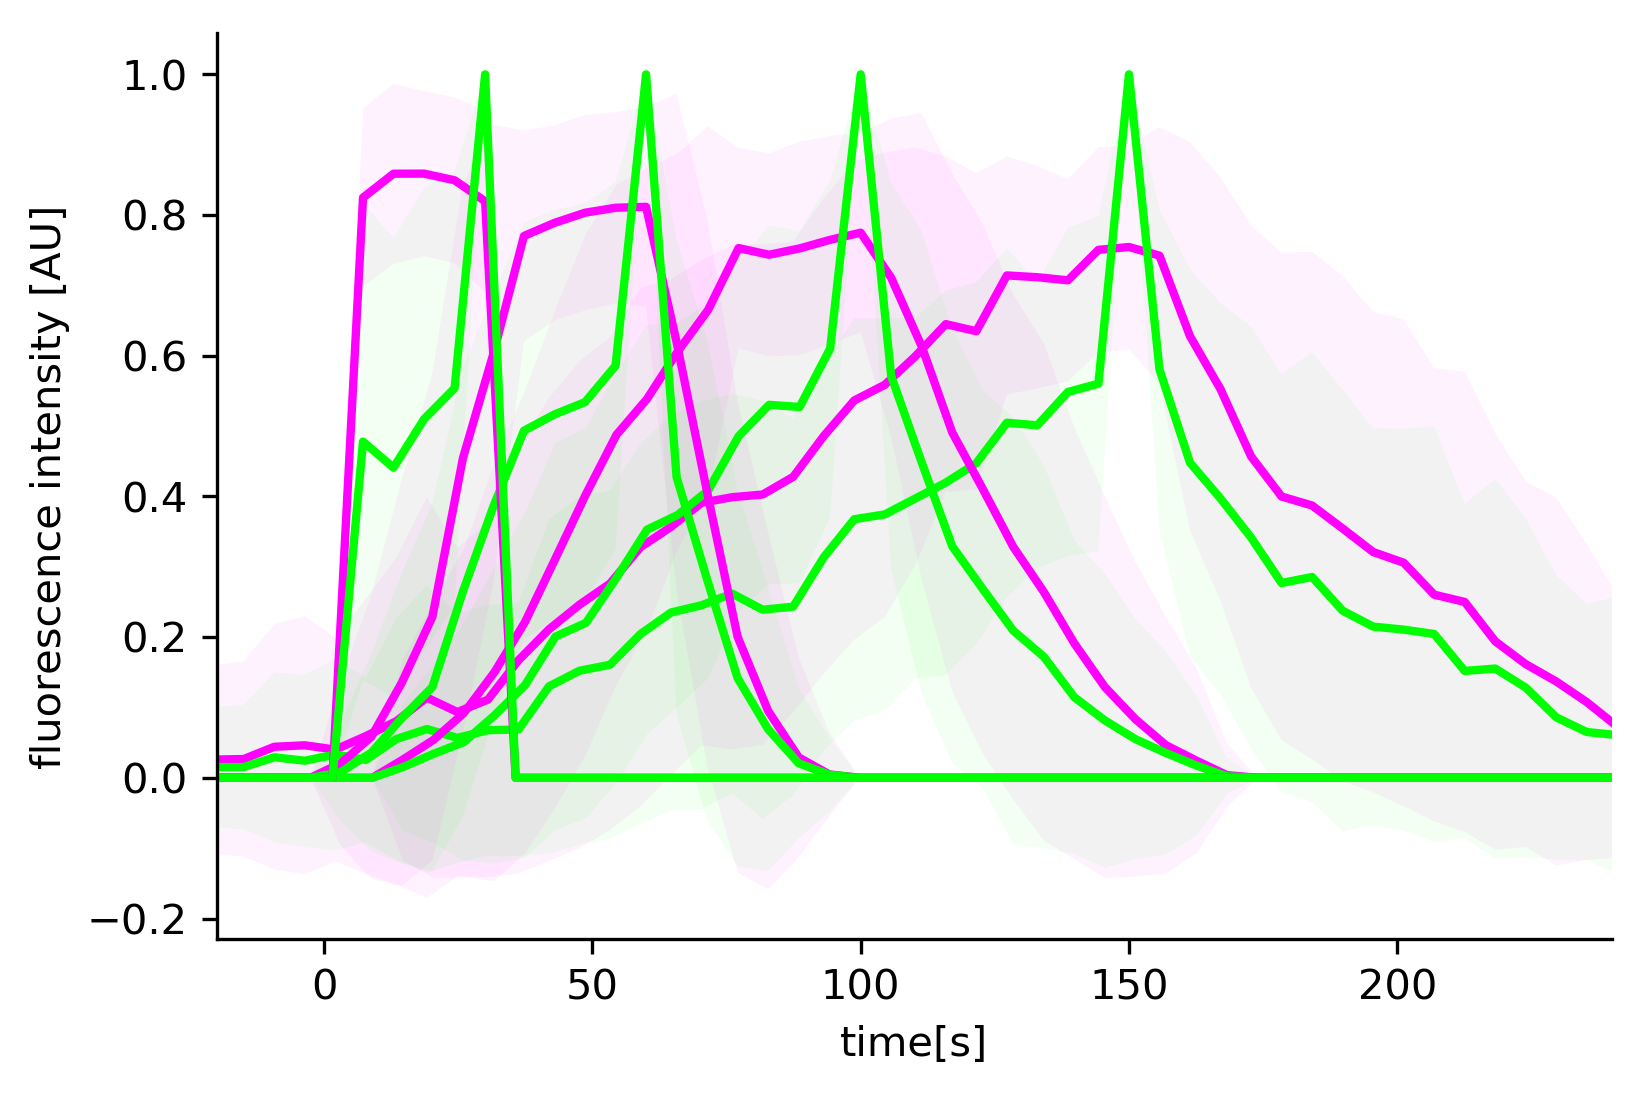

In [54]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,240)
#plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('fluorescence intensity [AU]')

(-120, 100)

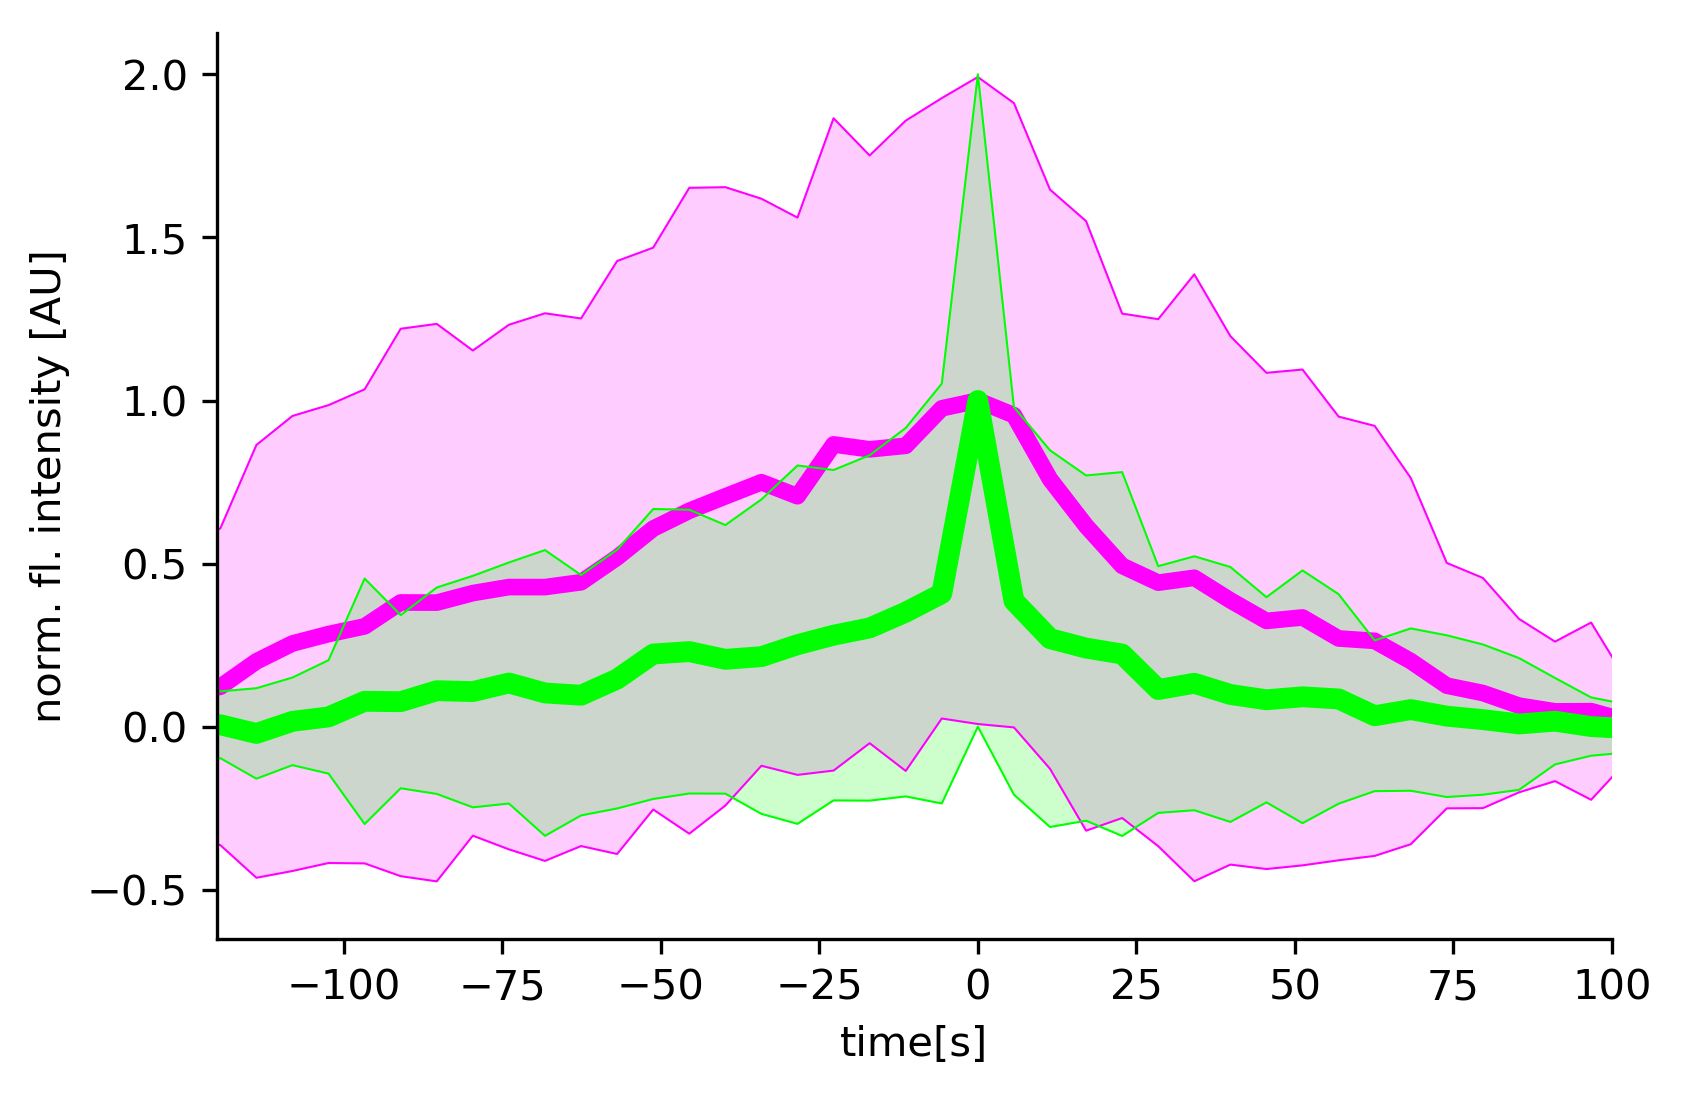

In [27]:
m_buffer_average = (np.nanmean(m_buffer,axis=0)-backgroundIntensity)
m_buffer_average = m_buffer_average/max(m_buffer_average)
s_buffer_average = (np.nanmean(s_buffer,axis=0)-backgroundIntensity)/max(s_buffer_average)
s_buffer_average = s_buffer_average/max(s_buffer_average)

m_buffer_std = np.nanstd(m_buffer,axis=0)
m_buffer_std = m_buffer_std/max(m_buffer_std)
s_buffer_std = np.nanstd(s_buffer,axis=0)
s_buffer_std = s_buffer_std/max(s_buffer_std)

time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)

plt.figure(dpi=300)

plt.plot(time,m_buffer_average,c='magenta',lw=4)
plt.plot(time,m_buffer_average-m_buffer_std,c='magenta',lw=0.5)
plt.plot(time,m_buffer_average+m_buffer_std,c='magenta',lw=0.5)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor='magenta',alpha=0.2)

plt.plot(time,s_buffer_average,c='lime',lw=5)
plt.plot(time,s_buffer_average-s_buffer_std,c='lime',lw=0.5)
plt.plot(time,s_buffer_average+s_buffer_std,c='lime',lw=0.5)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor='lime',alpha=0.2)

plt.xlabel('time[s]')
plt.ylabel('norm. fl. intensity [AU]')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.ylim(-0.5,2.1)
plt.xlim(-120,100)

(-220, 120)

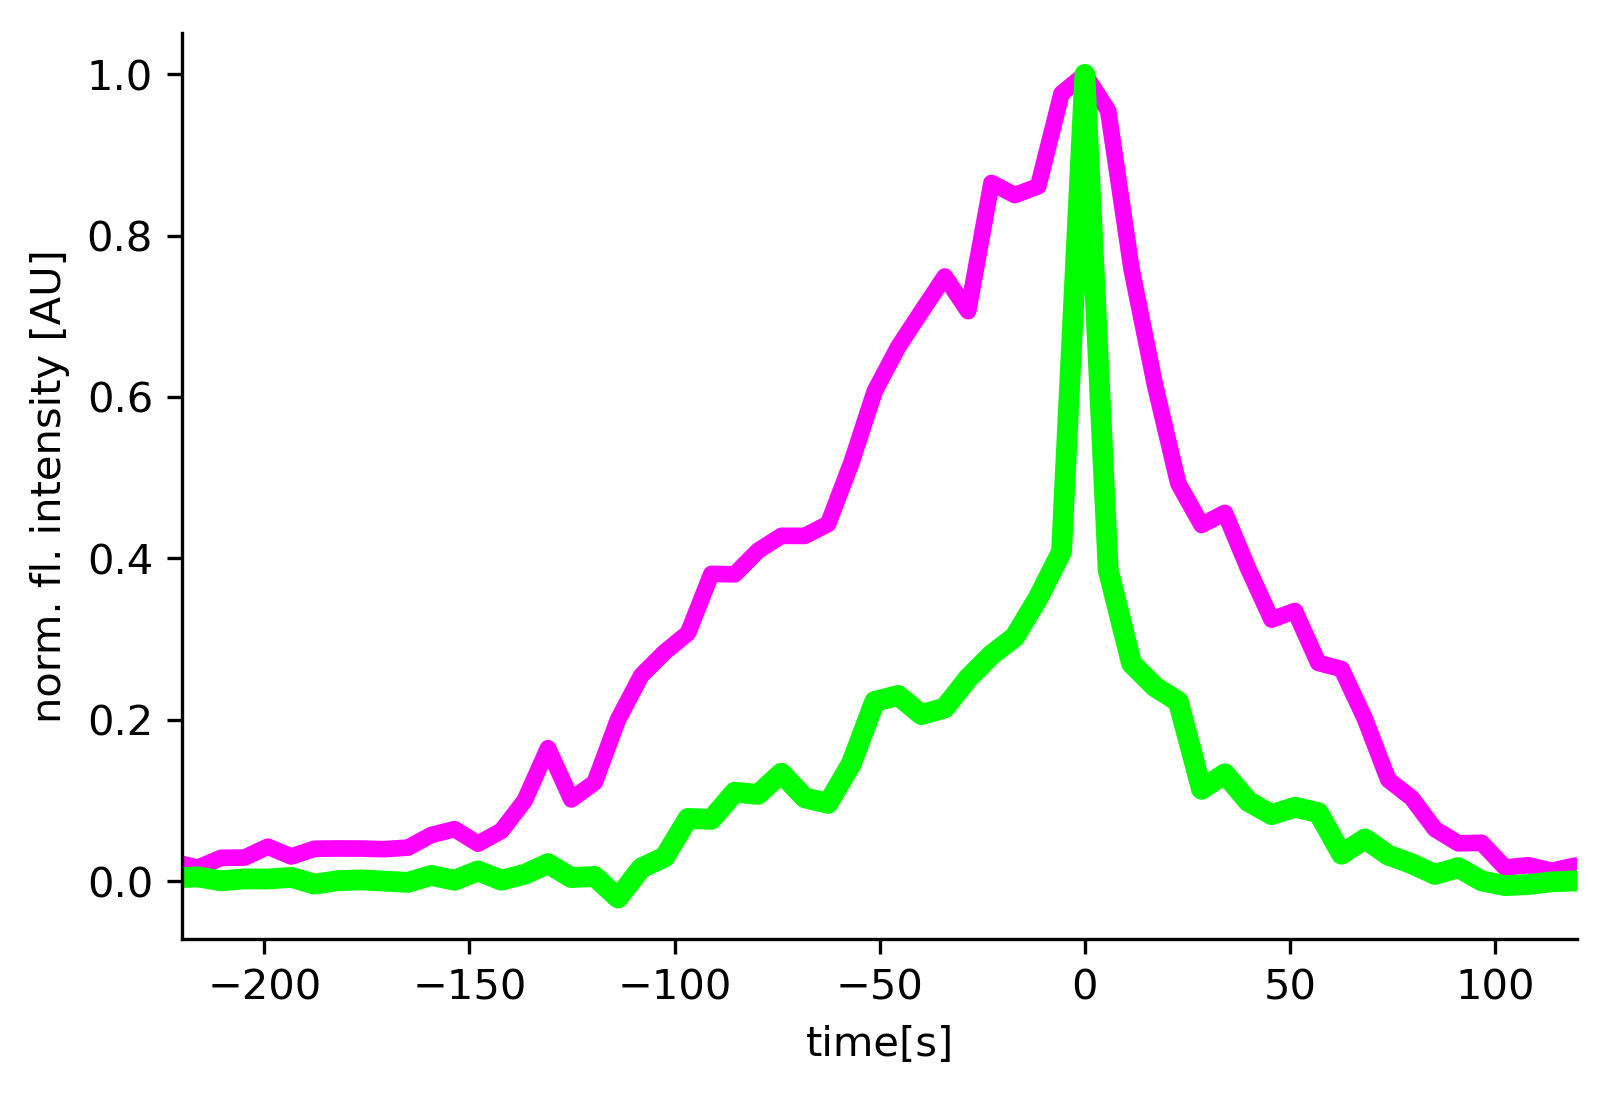

In [28]:

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)
plt.figure(dpi=300)
plt.plot(time,m_buffer_average/max(m_buffer_average),c='magenta',lw=4)
plt.plot(time,s_buffer_average/max(s_buffer_average),c='lime',lw=5)
plt.xlabel('time[s]')
plt.ylabel('norm. fl. intensity [AU]')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-220,120)


In [97]:
m_mean = []
s_mean = []
for i in range(0,bufferSize):
    m_mean.append(np.nanmean(m_buffer[i]))
    s_mean.append(np.nanmean(s_buffer[i]))
    
plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,m_mean, c='red')
plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,s_mean, c='green')

IndexError: index 16 is out of bounds for axis 0 with size 16

In [ ]:
#Lifetime Cohorts

In [ ]:
for tc in range(1,len(lifetimeCohorts)):

    m_buffer = []
    s_buffer = []
    bufferSize = 1000
    for i in range(0,bufferSize):
        m_buffer.append([])
        s_buffer.append([])
    
        
    for trackId in lifetimeCohorts[tc]:
        #print(trackId)
        track = data[data['trackId'] == trackId]
    
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        
        #plt.plot(s_intensity)
        
        for i in range(0,len(track)):
            m_buffer[i].append(m_intensity[i])
            s_buffer[i].append(s_intensity[i])
            
    
    m_mean = []
    s_mean = []
    for i in range(0,bufferSize):
        m_mean.append(np.nanmean(m_buffer[i]))
        s_mean.append(np.nanmean(s_buffer[i]))
        
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,m_mean, c='red')
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,s_mean, c='green')

plt.xlabel('lifetime[s]')
plt.show()




In [ ]:
for tc in range(1,len(lifetimeCohorts)):

    m_buffer = []
    s_buffer = []
    bufferSize = 1000
    for i in range(0,bufferSize):
        m_buffer.append([])
        s_buffer.append([])
    
        
    for trackId in lifetimeCohorts[tc]:
        #print(trackId)
        track = data[data['trackId'] == trackId]
    
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        
        #plt.plot(s_intensity)
        
        for i in range(0,len(track)):
            m_buffer[i].append(m_intensity[i])
            s_buffer[i].append(s_intensity[i])
            
    
    m_mean = []
    s_mean = []
    for i in range(0,bufferSize):
        m_mean.append(np.nanmean(m_buffer[i]))
        s_mean.append(np.nanmean(s_buffer[i]))
        
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,m_mean, c='red')
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,s_mean, c='green')

plt.xlabel('lifetime[s]')
plt.show()



In [ ]:
lifetimeThresholds = [1, 20, 40, 60, 80, 100, 120, 200]

lifetimeCohorts = []

dataBasis = cat_Ia_Tracks
for i in range(2,len(lifetimeThresholds)):
    lifetimeCohort_trackIds = np.unique(dataBasis.loc[(dataBasis["lifetime"] >= lifetimeThresholds[i-1]) & (dataBasis["lifetime"] < lifetimeThresholds[i]), "trackId"])
    print('number of tracks in cohort '+str(lifetimeThresholds[i-1])+'-'+str(lifetimeThresholds[i-1])+': '+str(len(lifetimeCohort_trackIds)))
    lifetimeCohorts.append(lifetimeCohort_trackIds)
#print(lifetimeCohorts)